<a href="https://colab.research.google.com/github/albillPE/clustering_lab/blob/main/PETROL_STATIONS_EJERCICIO_DE_SEGMENTACI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PETROL STATIONS**

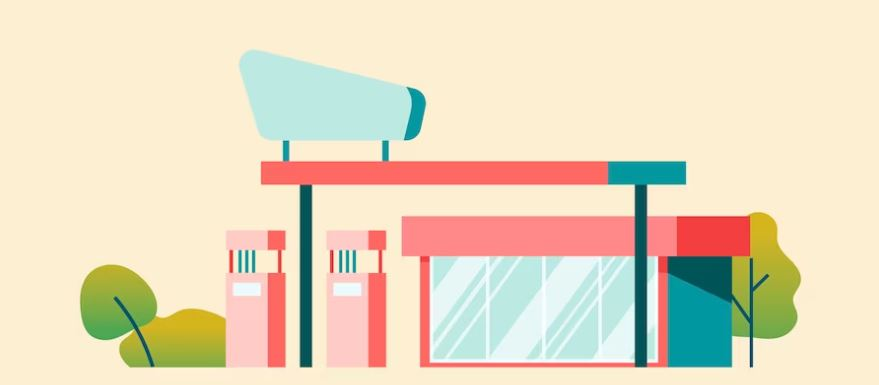

**Problemática de negocio:** Petrol Station ha identificado una caída alarmante de ventas durante el mes de dic'13, por lo que es necesario optimizar los esfuerzos de marketing entre las tipologías de clientes más relevantes para el negocio.

**OBJETIVOS**

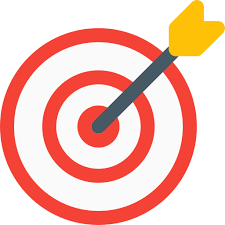



**1.	Elaborar un modelo de segmentación estratégica que permita: **

*   identificar los diferentes segmentos estratégicos de Clientes según el modelo definido, implantándolo en la bbdd disponible y clasificando así a todos los clientes disponibles
*   para cada segmento estratégico, cuantificar los principales KPI’s que permitan caracterizarlo (realizando de esta manera una perfilación que permita comprender las características de su comportamiento como clientes)


#Parte 1: Extensiones y librerías

In [ ]:
!pip install plotly
!pip install lifetimes
!pip install shap
!pip install scikit-learn
!pip install pandas pydrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from lifetimes.utils import summary_data_from_transaction_data
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import shap
import random
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import plotly.express as px

#Parte 2: carga de archivos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

xlsx_paths = [
    '/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/ESIC_CasoGrupal_Clientes01.xlsx',
    '/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/ESIC_CasoGrupal_Clientes02.xlsx',
    '/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/DEF_Trx_50k_2012_2013.xlsx',
    '/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/DEF_Trx_50k_2012_2013_COMPLETO.xlsx',
    '/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/ESIC_CasoGrupal_Distancias.xlsx'
]

dataframes = [pd.read_excel(path) for path in xlsx_paths]

In [ ]:
csv_paths = [
    '/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/ESIC_CasoGrupal_Clientes01.csv',
    '/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/ESIC_CasoGrupal_Clientes02.csv',
    '/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/DEF_Trx_50k_2012_2013.csv',
    '/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/DEF_Trx_50k_2012_2013_COMPLETO.CSV',
    '/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/ESIC_CasoGrupal_Distancias.csv'
]

for df, csv_path in zip(dataframes, csv_paths):
    df.to_csv(csv_path, index=False)

**Ahora le asignaremos nombres clave a los archivos CSV**

Nombres de data sets:

*   Clientes 1: cl1
*   Clientes 2: cl2
*   Transacciones: trx (solo SUBPRODUCTOS vendidos en litros)
*   Transacciones 02: trx2 (todos los SUBPRODUCTOS)
*   Distancias entre clientes y PDV: dis




In [ ]:
cl1 = pd.read_csv('/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/ESIC_CasoGrupal_Clientes01.csv')

In [ ]:
cl2 = pd.read_csv('/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/ESIC_CasoGrupal_Clientes02.csv')

In [ ]:
trx = pd.read_csv('/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/DEF_Trx_50k_2012_2013_COMPLETO.CSV')

In [ ]:
dis = pd.read_csv('/content/drive/MyDrive/DATA SET_BIG DATA Y MKT/2023_TRABAJO GRUPAL_BIG DATA Y MKT/ESIC_CasoGrupal_Distancias.csv')

#Parte 3: Análisis de datos y variables

**Registros totales y variables totales por cada data set**

In [ ]:
#Total registros y variables
cl1.shape

(49932, 11)

In [ ]:
#Total registros y variables
cl2.shape

(49932, 3)

In [ ]:
#Total registros y variables
trx.shape

(1048575, 6)

In [ ]:
#Total registros y variables
dis.shape

(46210, 3)

In [ ]:
#Visualización de heads y tails (5)
cl1.head()

,CDTITULAR_DEF,CDDISTRITO_POSTAL,CDICE,CDMES_ALTA,CDPROVINCIA,CDSEXO,EDAD,IDBLQ_EMAIL,IDBLQ_MAIL,IDBLQ_SMS,IDBLQ_TLF
0,1,8006,4,199608,8,H,77,0,0,2,0
1,2,8031,3,199608,8,H,56,2,0,2,0
2,3,8010,4,199608,8,H,66,0,0,2,0
3,4,8320,5,199608,8,H,51,1,0,0,0
4,5,8035,3,199608,8,M,53,1,0,2,0


In [ ]:
cl1.tail()

,CDTITULAR_DEF,CDDISTRITO_POSTAL,CDICE,CDMES_ALTA,CDPROVINCIA,CDSEXO,EDAD,IDBLQ_EMAIL,IDBLQ_MAIL,IDBLQ_SMS,IDBLQ_TLF
49927,49956,28410,4,201003,28,H,57,0,1,0,0
49928,49957,40470,4,201101,40,H,80,2,0,2,0
49929,49958,40450,3,201011,40,M,61,0,0,2,0
49930,49959,28944,4,201002,28,M,41,2,0,0,0
49931,49960,28944,3,201202,28,M,49,0,0,2,0


In [ ]:
#Visualización de heads y tails (5)
cl2.head()

,CDTITULAR_DEF,GASOLINAS_OTRAS2012,GASOLINAS_OTRAS2013
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


In [ ]:
cl2.tail()

,CDTITULAR_DEF,GASOLINAS_OTRAS2012,GASOLINAS_OTRAS2013
49927,49956,0,0
49928,49957,0,0
49929,49958,0,0
49930,49959,0,0
49931,49960,0,0


In [ ]:
#Visualización de heads y tails (5)
trx.head()

,CDTITULAR_DEF,CAIMPORTE,CALITRO,CDMES_TRX,IDSUBCONCEPTO,IDPPVV_FISICO
0,45091,14,10,201209,20001005,4515
1,45091,10,7,201209,20001005,4514
2,45091,30,22,201204,20001005,3000
3,45091,7,5,201204,20001005,3976
4,45091,10,7,201204,20001005,2627


In [ ]:
trx.tail()

,CDTITULAR_DEF,CAIMPORTE,CALITRO,CDMES_TRX,IDSUBCONCEPTO,IDPPVV_FISICO
1048570,13477,50,37,201301,20001005,89477
1048571,13477,55,40,201302,20001005,89477
1048572,13477,50,37,201302,20001005,7532
1048573,13477,20,15,201302,20001005,2159
1048574,13477,43,34,201305,20001005,2159


In [ ]:
#Visualización de heads y tails (5)
dis.head()

,CDTITULAR_DEF,IDPPVV_FISICO,DISTANCIA_METROS
0,1,8922,1858.61
1,2,8922,5337.44
2,3,8922,3883.53
3,4,6197,8109.02
4,5,8922,3209.78


In [ ]:
dis.tail()

,CDTITULAR_DEF,IDPPVV_FISICO,DISTANCIA_METROS
46205,49954,3293,11689.04
46206,49956,5200,14232.65
46207,49958,500,13566.24
46208,49959,6488,14921.80
46209,49960,79554,9562.60


**Ahora verificaremos los formatos de cada variable**

In [ ]:
cl1.dtypes

CDTITULAR_DEF         int64
CDDISTRITO_POSTAL     int64
CDICE                 int64
CDMES_ALTA            int64
CDPROVINCIA           int64
CDSEXO               object
EDAD                  int64
IDBLQ_EMAIL           int64
IDBLQ_MAIL            int64
IDBLQ_SMS             int64
IDBLQ_TLF             int64
dtype: object

In [ ]:
cl2.dtypes

CDTITULAR_DEF          int64
GASOLINAS_OTRAS2012    int64
GASOLINAS_OTRAS2013    int64
dtype: object

In [ ]:
trx.dtypes

CDTITULAR_DEF     int64
CAIMPORTE         int64
CALITRO          object
CDMES_TRX         int64
IDSUBCONCEPTO     int64
IDPPVV_FISICO     int64
dtype: object

In [ ]:
dis.dtypes

CDTITULAR_DEF         int64
IDPPVV_FISICO         int64
DISTANCIA_METROS    float64
dtype: object

**Verificación de valores nulos por variable**

In [ ]:
null_counts_cl1 = cl1.isnull().sum()
print(null_counts_cl1)

CDTITULAR_DEF        0
CDDISTRITO_POSTAL    0
CDICE                0
CDMES_ALTA           0
CDPROVINCIA          0
CDSEXO               0
EDAD                 0
IDBLQ_EMAIL          0
IDBLQ_MAIL           0
IDBLQ_SMS            0
IDBLQ_TLF            0
dtype: int64


In [ ]:
null_counts_cl2 = cl2.isnull().sum()
print(null_counts_cl2)

CDTITULAR_DEF          0
GASOLINAS_OTRAS2012    0
GASOLINAS_OTRAS2013    0
dtype: int64


In [ ]:
null_counts_trx = trx.isnull().sum()
print(null_counts_trx)

CDTITULAR_DEF    0
CAIMPORTE        0
CALITRO          0
CDMES_TRX        0
IDSUBCONCEPTO    0
IDPPVV_FISICO    0
dtype: int64


In [ ]:
null_counts_dis = dis.isnull().sum()
print(null_counts_dis)

CDTITULAR_DEF       0
IDPPVV_FISICO       0
DISTANCIA_METROS    0
dtype: int64


#Parte 4: Transformación de variables clave para el análisis

Verificamos los valores no númericos de la variable CALITRO

In [ ]:
# Verificamos si cada valor en la columna 'CALITRO' es un número
trx['CALITRO_isnumeric'] = trx['CALITRO'].apply(lambda x: str(x).isnumeric())


# Mostramos las filas donde los valores de 'CALITRO' no son numéricos
non_numeric_CALITROS = trx[~trx['CALITRO_isnumeric']]

# Mostramos las primeras 5 filas donde 'CALITROS' no es numérico para verificar
non_numeric_CALITROS_head = non_numeric_CALITROS.head(5)
print('Primeros 5 registros de cantidad de litros que no son numéricos:')
print(non_numeric_CALITROS_head)

Primeros 5 registros de cantidad de litros que no son numéricos:
     CDTITULAR_DEF  CAIMPORTE CALITRO  CDMES_TRX  IDSUBCONCEPTO  \
25           45091         15             201201       20009001   
32           45091          2             201203       20009001   
48           45091          2             201312       20009001   
60           45091          1             201205       20009001   
100          36522          1             201207       20009001   

     IDPPVV_FISICO  CALITRO_isnumeric  
25            3976              False  
32            4515              False  
48            3976              False  
60            3976              False  
100           7512              False  


In [ ]:
# Convertimos todos los valores de CALITROS a INT64, transformando los valores vacíos a NULL
trx['CALITRO'] = pd.to_numeric(trx['CALITRO'], errors='coerce').astype('Int64')

# Verificamos el resultado
print(trx.dtypes)

CDTITULAR_DEF        int64
CAIMPORTE            int64
CALITRO              Int64
CDMES_TRX            int64
IDSUBCONCEPTO        int64
IDPPVV_FISICO        int64
CALITRO_isnumeric     bool
dtype: object


In [ ]:
# Ahora contabilizamos los valores nulos
null_counts_trx = trx.isnull().sum()
print(null_counts_trx)

CDTITULAR_DEF            0
CAIMPORTE                0
CALITRO              71107
CDMES_TRX                0
IDSUBCONCEPTO            0
IDPPVV_FISICO            0
CALITRO_isnumeric        0
dtype: int64


In [ ]:
#Se decidió excluir los valores nulos del dataset "trx" ya que no representan a la actividad comercial principal del negocio. Los ID's asociados a esos registros equivalen a un 2% de las ventas totales
#Se dejará la copia trx2 para consultar la información completa en los casos donde sea necesario
trx2 = trx.copy()

In [ ]:
trx = trx.dropna()

In [ ]:
#Verificamos nuevamente la presencia de nulos para confirmar que efectivamente los excluimos
null_counts_trx = trx.isnull().sum()
print(null_counts_trx)

CDTITULAR_DEF        0
CAIMPORTE            0
CALITRO              0
CDMES_TRX            0
IDSUBCONCEPTO        0
IDPPVV_FISICO        0
CALITRO_isnumeric    0
dtype: int64


**Una vez analizados los data sets por separado se ha decidido unificar los data sets de clientes 01 y clientes 02. El nuevo título del dataframe será "cl"**

In [ ]:
# Realizar la unión basada en la columna CDTITULAR_DEF
cl = pd.merge(cl1, cl2, on='CDTITULAR_DEF')

# Verificar el resultado
cl.head (5)

,CDTITULAR_DEF,CDDISTRITO_POSTAL,CDICE,CDMES_ALTA,CDPROVINCIA,CDSEXO,EDAD,IDBLQ_EMAIL,IDBLQ_MAIL,IDBLQ_SMS,IDBLQ_TLF,GASOLINAS_OTRAS2012,GASOLINAS_OTRAS2013
0,1,8006,4,199608,8,H,77,0,0,2,0,0,0
1,2,8031,3,199608,8,H,56,2,0,2,0,0,0
2,3,8010,4,199608,8,H,66,0,0,2,0,0,0
3,4,8320,5,199608,8,H,51,1,0,0,0,0,0
4,5,8035,3,199608,8,M,53,1,0,2,0,0,0


**Antes de iniciar la exploración de datos es necesario transformar el formato de fechas para facilitar la creación de gráficos.**

In [ ]:
# Convertir la columna 'CDMES_ALTA' en formato entero a objetos de fecha
cl['CDMES_ALTA'] = pd.to_datetime(cl['CDMES_ALTA'], format='%Y%m')

# Crear una nueva columna con las fechas en formato corto de mes y año
cl['Fecha_Corta'] = cl['CDMES_ALTA'].dt.strftime('%m-%Y')

In [ ]:
# Convertir la columna 'CDMES_TRX' en formato entero a objetos de fecha
trx['CDMES_TRX'] = pd.to_datetime(trx['CDMES_TRX'], format='%Y%m')

# Crear una nueva columna con las fechas en formato corto de mes y año
trx['Fecha_Corta'] = trx['CDMES_TRX'].dt.strftime('%m-%Y')

#Parte 5: Análisis exploratorio de la información

**Evolución de ventas mensuales**

In [ ]:
monthly_trx = trx.groupby(trx['CDMES_TRX'].dt.to_period("M"))['CAIMPORTE'].sum().reset_index()

In [ ]:
# Convertir la columna 'CDMES_TRX' de objetos Period a formato de fecha
monthly_trx['CDMES_TRX'] = monthly_trx['CDMES_TRX'].dt.to_timestamp()

# Calcular la tasa de crecimiento mensual
monthly_trx['Tasa_Crecimiento'] = monthly_trx['CAIMPORTE'].pct_change() * 100

# Crear un gráfico interactivo con plotly
fig = px.line(monthly_trx, x='CDMES_TRX', y='CAIMPORTE', title='Tendencia de importes por mes')

# Configurar las etiquetas del eje x
fig.update_xaxes(title_text='Fecha')

# Configurar las etiquetas del eje y
fig.update_yaxes(title_text='Importe')

# Mostrar el valor del importe y la tasa de crecimiento en cada punto al pasar el cursor
fig.update_traces(
    hovertemplate='Fecha: %{x}<br>Importe: %{y}<br>Tasa de Crecimiento: %{customdata:.2f}%',
    customdata=monthly_trx['Tasa_Crecimiento']
)

# Mostrar el gráfico interactivo
fig.show()


**Evolución del volumen de litros vendidos de carburantes premium y estandar**

In [ ]:
#Carburantes premium-0, carburantes estandar-1
# Lista de códigos para "Carburante premium"
premium_codes = [20001003, 20001011, 20001019, 20001020, 20001021, 20001022, 20001023, 20001024, 20001025]

# Agregamos una nueva columna llamada 'Tipo_Carburante' basada en los códigos
trx['Tipo_Carburante'] = trx['IDSUBCONCEPTO'].apply(lambda x: '0' if x in premium_codes else '1')

In [ ]:
trx.dtypes

CDTITULAR_DEF                 int64
CAIMPORTE                     int64
CALITRO                       Int64
CDMES_TRX            datetime64[ns]
IDSUBCONCEPTO                 int64
IDPPVV_FISICO                 int64
CALITRO_isnumeric              bool
Fecha_Corta                  object
Tipo_Carburante              object
dtype: object

In [ ]:
# Creamos una copia del DataFrame para trabajar sin modificar el original
trx_copy = trx.copy()

# Agrupamos los datos por tipo de carburante y calculamos las sumas
grouped_litros = trx_copy.groupby('Tipo_Carburante')['CALITRO'].sum().reset_index()

# Renombramos los tipos de carburante para que coincidan con las etiquetas en el gráfico
grouped_litros['Tipo_Carburante'] = grouped_litros['Tipo_Carburante'].apply(lambda x: 'Carburante premium' if x == '0' else 'Carburante estandar')

# Creamos un gráfico de pastel (pie chart) con Plotly
fig = px.pie(grouped_litros, values='CALITRO', names='Tipo_Carburante',
             title='Distribución de Litros Vendidos de Carburantes Premium vs Estándar')

# Mostramos el gráfico interactivo
fig.show()

In [ ]:
# Creamos una columna 'Mes_Año' con las fechas en formato corto de mes y año
trx_copy['Mes_Año'] = trx_copy['CDMES_TRX'].dt.strftime('%m-%Y')

# Filtramos los datos solo para carburante estándar (Tipo_Carburante == '1')
carburante_estandar = trx_copy[trx_copy['Tipo_Carburante'] == '1']

# Filtramos los datos solo para carburante premium (Tipo_Carburante == '0')
carburante_premium = trx_copy[trx_copy['Tipo_Carburante'] == '0']

# Agrupamos los datos por 'Mes_Año' y calculamos las sumas de litros
grouped_litros_estandar = carburante_estandar.groupby('Mes_Año')['CALITRO'].sum().reset_index()
grouped_litros_premium = carburante_premium.groupby('Mes_Año')['CALITRO'].sum().reset_index()

# Convertimos la columna 'Mes_Año' en objetos datetime para ordenar cronológicamente
grouped_litros_estandar['Mes_Año'] = pd.to_datetime(grouped_litros_estandar['Mes_Año'], format='%m-%Y')
grouped_litros_premium['Mes_Año'] = pd.to_datetime(grouped_litros_premium['Mes_Año'], format='%m-%Y')

# Ordenamos los DataFrames por fechas
grouped_litros_estandar = grouped_litros_estandar.sort_values('Mes_Año')
grouped_litros_premium = grouped_litros_premium.sort_values('Mes_Año')

# Creamos un gráfico de barras para los litros de carburante estándar con Plotly
fig = px.bar(grouped_litros_estandar, x='Mes_Año', y='CALITRO', color_discrete_sequence=['blue'],
             title='Litros de Carburante Estándar y Premium Vendidos por Mes: Azul-Estandar, Rojo-Premium',
             labels={'Mes_Año': 'Mes', 'CALITRO': 'Litros Vendidos'})

# Agregamos las barras de litros de carburante premium al gráfico existente
fig.add_trace(px.bar(grouped_litros_premium, x='Mes_Año', y='CALITRO', color_discrete_sequence=['red']).data[0])


# Mostramos el gráfico interactivo
fig.show()


**Precios promedio por litro para las categorías de carburantes premiu y estandar**

In [ ]:
# Filtramos los datos solo para carburante estándar (Tipo_Carburante == '1')
carburante_estandar = trx_copy[trx_copy['Tipo_Carburante'] == '1']

# Filtramos los datos solo para carburante premium (Tipo_Carburante == '0')
carburante_premium = trx_copy[trx_copy['Tipo_Carburante'] == '0']

# Agrupar los datos por 'Mes_Año' y calcular los precios promedio por litro
grouped_precios_estandar = carburante_estandar.groupby('Mes_Año').agg({'CAIMPORTE': 'sum', 'CALITRO': 'sum'})
grouped_precios_estandar['Precio_Promedio_Litro'] = grouped_precios_estandar['CAIMPORTE'] / grouped_precios_estandar['CALITRO']

grouped_precios_premium = carburante_premium.groupby('Mes_Año').agg({'CAIMPORTE': 'sum', 'CALITRO': 'sum'})
grouped_precios_premium['Precio_Promedio_Litro'] = grouped_precios_premium['CAIMPORTE'] / grouped_precios_premium['CALITRO']

# Unir los DataFrames para el gráfico
combined_df = pd.concat([grouped_precios_estandar, grouped_precios_premium], keys=['Estándar', 'Premium'])

# Resetear el índice para obtener 'Mes_Año' como columna
combined_df.reset_index(inplace=True)

# Ordenar el DataFrame por 'Mes_Año'
combined_df = combined_df.sort_values(by='Mes_Año')

# Convertir la columna 'Mes_Año' en formato de cadena (string)
combined_df['Mes_Año'] = combined_df['Mes_Año'].astype(str)

# Crear el gráfico interactivo con Plotly
fig = px.line(combined_df, title='Evolución del Precio Promedio por Litro',
              x='Mes_Año', y='Precio_Promedio_Litro', color='level_0')

fig.update_layout(xaxis_tickformat='%b %Y')  # Formato de las etiquetas del eje x (mes y año)

fig.show()


**Análisis de usuarios activos y productos más vendidos**

Para este análisis utilizaremos el data frame con todas las transacciones, sin importar la categoría de producto.

In [ ]:
# Creamos una copia del DataFrame para trabajar sin modificar el original
trx2_copy = trx2.copy()
print(trx2_copy.head())

   CDTITULAR_DEF  CAIMPORTE  CALITRO  CDMES_TRX  IDSUBCONCEPTO  IDPPVV_FISICO  \
0          45091         14       10     201209       20001005           4515   
1          45091         10        7     201209       20001005           4514   
2          45091         30       22     201204       20001005           3000   
3          45091          7        5     201204       20001005           3976   
4          45091         10        7     201204       20001005           2627   

   CALITRO_isnumeric  
0               True  
1               True  
2               True  
3               True  
4               True  


In [ ]:
# Extraemos el año y el mes de la columna 'CDMES_TRX'
trx2_copy['CDMES_TRX'] = pd.to_datetime(trx2_copy['CDMES_TRX'], format='%Y%m')

# Creamos una nueva columna 'Mes_Año' con las fechas en formato corto de mes y año
trx2_copy['Mes_Año'] = trx2_copy['CDMES_TRX'].dt.strftime('%m-%Y')

In [ ]:
# Calculamos el promedio de transacciones por mes/año
promedio_por_mes = trx2_copy.groupby(trx2_copy['CDMES_TRX'].dt.to_period('M'))['CDTITULAR_DEF'].count()


# Calculamos el recuento de valores únicos mensuales de CDTITULAR_DEF
recuento_por_mes = trx2_copy.groupby(trx2_copy['CDMES_TRX'].dt.to_period('M'))['CDTITULAR_DEF'].nunique()


# Calculamos el promedio de transacciones por cliente en el mes
promedio_por_cliente = promedio_por_mes / recuento_por_mes


# Convertimos PeriodIndex a strings
recuento_por_mes.index = recuento_por_mes.index.to_timestamp()
promedio_por_mes.index = promedio_por_mes.index.to_timestamp()

# Creamosla figura de Plotly
fig = go.Figure()

# Definimos las etiquetas dinámicas para la serie de línea
etiquetas_linea = [
    f'Recuento Único: {recuento}<br>Promedio por Cliente Mensual: {promedio_cliente:.2f}'
    for recuento, promedio_cliente in zip(recuento_por_mes.values, promedio_por_cliente.values)
]

# Agregamos línea de tendencia con etiquetas dinámicas
fig.add_trace(go.Scatter(x=recuento_por_mes.index, y=recuento_por_mes.values,
                         mode='lines+markers', name='Recuento Único',
                         text=etiquetas_linea, hoverinfo='text+name'))

# Agregamos la serie de barras
fig.add_trace(go.Bar(x=promedio_por_mes.index, y=promedio_por_mes.values,
                     name='Promedio General', opacity=0.5))

# Actualizamos el diseño del gráfico
fig.update_layout(title='Recuento Único de Clientes vs. Promedio General de Transacciones por Mes/Año',
                  xaxis_title='Mes/Año', yaxis_title='Cantidad')

# Mostramos el gráfico combinado interactivo
fig.show()

**Importes anuales según tipo de producto 2012-2013 y su respectiva variación**

In [ ]:
# Definimos los subconceptos a mostrar en nuestra tabla
subconceptos_data = {
    'Cd_Subconcepto': [20001001, 20001002, 20001003, 20001004, 20001005, 20001011, 20001012, 20001014, 20001015,
                       20001019, 20001020, 20001021, 20001022, 20001023, 20001024, 20001025, 20001013,
                       20009001, 20008001, 20009002],
    'Desc_Subconcepto': ['Gasolina Super', 'Efitec 95', 'Efitec 98', 'Gasolina Normal', 'Diesel e+', 'Diesel e+ 10',
                         'Biodiesel', 'Autogas', 'Autogas-G', 'CityDiesel', 'Efitec 95 Premium', 'Gasolina G100',
                         'Gasolina 95', 'Gasoleo A', 'Gasoleo A+', 'Gasolina 98', 'Blue+', 'Tienda', 'Lavado',
                         'Lubricantes'],
    'Tipo': ['Carburante estandar', 'Carburante estandar', 'Carburante premium', 'Carburante estandar', 'Carburante estandar',
             'Carburante premium', 'Carburante estandar', 'Carburante estandar', 'Carburante estandar', 'Carburante premium',
             'Carburante premium', 'Carburante premium', 'Carburante premium', 'Carburante premium', 'Carburante premium',
             'Carburante premium', 'Blue+', 'Tienda', 'Lavado', 'Lubricantes']
}

# Creamos un DataFrame de subconceptos
df_subconceptos = pd.DataFrame(subconceptos_data)

# Filtramos los datos para los años 2012 y 2013
trx2_2012 = trx2_copy[trx2_copy['CDMES_TRX'].dt.year == 2012]
trx2_2013 = trx2_copy[trx2_copy['CDMES_TRX'].dt.year == 2013]

# Calculamos la suma total de CAIMPORTE para cada IDSUBCONCEPTO en 2012 y 2013
total_2012 = trx2_2012.groupby('IDSUBCONCEPTO')['CAIMPORTE'].sum()
total_2013 = trx2_2013.groupby('IDSUBCONCEPTO')['CAIMPORTE'].sum()

# Obtenemos los índices únicos de ambos años
indices_unicos = set(total_2012.index) | set(total_2013.index)

# Creamos un DataFrame con los resultados
data = {
    'IDSUBCONCEPTO': list(indices_unicos),
    'Total 2012': [total_2012.get(idx, 0) for idx in indices_unicos],
    'Total 2013': [total_2013.get(idx, 0) for idx in indices_unicos],
    'Variación %': [
        ((total_2013.get(idx, 0) - total_2012.get(idx, 0)) / total_2012.get(idx, 0) * 100).round(2)
        for idx in indices_unicos
    ]
}

# Creamos un DataFrame con la matriz de datos
df_matriz = pd.DataFrame(data)

# Combinamos el DataFrame de la matriz con el DataFrame de subconceptos
df_matriz = df_matriz.merge(df_subconceptos, left_on='IDSUBCONCEPTO', right_on='Cd_Subconcepto', how='left')

# Ordenamos el DataFrame por la columna "Variación %" en orden descendente
df_matriz = df_matriz.sort_values(by='Variación %', ascending=True)

# Seleccionamos y ordenar las columnas según el orden deseado
column_order = ['IDSUBCONCEPTO', 'Desc_Subconcepto', 'Tipo', 'Total 2012', 'Total 2013', 'Variación %']
df_matriz = df_matriz[column_order]


# Mostramos el DataFrame de la matriz ordenado
print(df_matriz)

    IDSUBCONCEPTO   Desc_Subconcepto                 Tipo  Total 2012  \
4        20001003          Efitec 98   Carburante premium      675162   
1        20008001             Lavado               Lavado       55755   
5        20009002        Lubricantes          Lubricantes      127898   
8        20001011       Diesel e+ 10   Carburante premium     2432120   
3        20001002          Efitec 95  Carburante estandar     3696337   
6        20001005          Diesel e+  Carburante estandar    21770885   
12       20001015          Autogas-G  Carburante estandar       15205   
13       20001020  Efitec 95 Premium   Carburante premium        1080   
2        20009001             Tienda               Tienda      331499   
10       20001013              Blue+                Blue+       18225   
11       20001014            Autogas  Carburante estandar       22942   
9        20001012          Biodiesel  Carburante estandar         566   
0        20001024         Gasoleo A+   Carburante p

<ipython-input-53-cd5f26f08b62>:36: RuntimeWarning:

divide by zero encountered in long_scalars



**Análisis de la base de clientes registrados en el CRM de la empresa**

In [ ]:
# Calculamos el total general de CDTITULAR_DEF
total_general = cl['CDTITULAR_DEF'].count()

# Creamos un DataFrame para el segundo nivel del Sankey
df_sankey = cl.groupby('CDSEXO')['CDTITULAR_DEF'].count().reset_index()
df_sankey.columns = ['Genero', 'Count']

# Agregamos las otras categorías (E=Empresas, N=No disponible)
otros_contadores = {
    'E': cl[cl['CDSEXO'] == 'E']['CDTITULAR_DEF'].count(),
    'N': cl[cl['CDSEXO'] == 'N']['CDTITULAR_DEF'].count()
}
df_sankey = df_sankey.append(pd.DataFrame({'Genero': list(otros_contadores.keys()), 'Count': list(otros_contadores.values())}))

# Creamos el diagrama de Sankey
fig = go.Figure(go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=["Total General", "Hombres", "Mujeres", "Empresas", "No disponible"],  # Etiquetas de los nodos
    ),
    link=dict(
        source=[0, 0, 0, 0],  # Origen: Total General
        target=[1, 2, 3, 4],  # Destinos: Hombres, Mujeres, Empresas y No disponible
        value=[df_sankey.loc[df_sankey['Genero'] == 'H', 'Count'].iloc[0],
               df_sankey.loc[df_sankey['Genero'] == 'M', 'Count'].iloc[0],
               df_sankey.loc[df_sankey['Genero'] == 'E', 'Count'].iloc[0],
               df_sankey.loc[df_sankey['Genero'] == 'N', 'Count'].iloc[0]],
    )
))

# Mostramos el diagrama de Sankey
fig.show()

In [ ]:
# Creamos un histograma interactivo de CDTITULAR_DF por clases de edades
fig = px.histogram(cl, x='EDAD', nbins=10, title="Histograma Interactivo de CDTITULAR_DF por Clases de Edades")
fig.update_layout(
    xaxis_title="Edad",
    yaxis_title="Frecuencia",
    xaxis=dict(tickvals=list(range(0, 101, 10))),
    showlegend=False
)
fig.update_traces(marker_color='rgba(50, 171, 96, 0.6)')

# Mostramos el histograma interactivo
fig.show()

Antes de continuar realizaremos una imputación de datos con edades atípicas según la media de los registros con igual CDICE

In [ ]:
# Calcular la media de las edades para cada valor único en CDICE (1 al 5)
average_ages = cl[cl['EDAD'] <= 100].groupby('CDICE')['EDAD'].mean().astype(int)

# Iterar por los registros en 'cl' con edades mayores a 100 y reemplazar con la media correspondiente
for index, row in cl.iterrows():
    if row['EDAD'] > 100:
        cl.at[index, 'EDAD'] = average_ages[row['CDICE']]

# Imprimir el valor máximo de la columna EDAD después de la imputación
max_age_after_imputation = cl['EDAD'].max()
print("Valor máximo de la columna EDAD después de la imputación:", max_age_after_imputation)

Valor máximo de la columna EDAD después de la imputación: 99


In [ ]:
# Repetimos el histograma interactivo de CDTITULAR_DF por clases de edades para verificar la imputación de datos
fig = px.histogram(cl, x='EDAD', nbins=10, title="Histograma Interactivo de CDTITULAR_DF por Clases de Edades")
fig.update_layout(
    xaxis_title="Edad",
    yaxis_title="Frecuencia",
    xaxis=dict(tickvals=list(range(0, 101, 10))),
    showlegend=False
)
fig.update_traces(marker_color='rgba(50, 171, 96, 0.6)')

# Mostrar el histograma interactivo
fig.show()

**Análisis según el indice de capacidad económica**

In [ ]:
# Mapeamos los valores numéricos a sus valores descriptivos correspondientes
cdice_mapping = {
    1: 'Clase baja',
    2: 'Clase media-baja',
    3: 'Clase media',
    4: 'Clase media-alta',
    5: 'Clase alta'
}
cl['CDICE_descriptivo'] = cl['CDICE'].map(cdice_mapping)

# Realizamos un recuento de los valores en la columna CDICE descriptiva
cdice_counts = cl['CDICE_descriptivo'].value_counts()

# Creamos un gráfico de barras interactivo de CDICE
fig = px.bar(x=cdice_counts.index, y=cdice_counts.values, labels={'x': 'Índice de Capacidad Económica', 'y': 'Cantidad de CDTITULAR_DF'},
             title="Distribución de CDICE (Índice de Capacidad Económica)")

# Mostramos el gráfico de barras interactivo
fig.show()

**Evolución mensual de las transacciones según grupos económicos**

In [ ]:
# Unimos los DataFrames 'trx' y 'cl' por la columna CDTITULAR_DEF
merged_cl_trx = pd.merge(trx, cl, on='CDTITULAR_DEF', how='left')

# Creamos una nueva columna 'CDICE' en el DataFrame trx
merged_cl_trx['CDICE'] = merged_cl_trx['CDICE'].fillna(0)  # Rellenar con 0 si no hay coincidencia

In [ ]:
# Convertimos la columna CDMES_TRX a tipo de dato de fecha
merged_cl_trx['CDMES_TRX'] = pd.to_datetime(merged_cl_trx['CDMES_TRX'])

# Agrupamos por mes, categoría de CDICE_descriptivo y contar los registros únicos
grouped_data = merged_cl_trx.groupby(['CDMES_TRX', 'CDICE_descriptivo'])['CDTITULAR_DEF'].count().reset_index()

# Creamos el gráfico de líneas interactivo con Plotly
fig = px.line(grouped_data, x='CDMES_TRX', y='CDTITULAR_DEF', color='CDICE_descriptivo',
              title='Recuento Mensual de CDTITULAR_DEF por Categoría de CDICE_descriptivo',
              labels={'CDMES_TRX': 'Mes', 'CDTITULAR_DEF': 'Recuento'},
              markers=True)

# Mostramos el gráfico interactivo
fig.show()

# Parte 5: Modelo CLTV

Para realizar este análisis debemos de unificar los datos de cada cliente (identificados con su ID) con sus transacciones.

In [ ]:
# Unimos los DataFrames usando la columna 'CDTITULAR_DEF' como clave primaria
df = pd.merge(cl1, cl2, on='CDTITULAR_DEF', how='inner')  # Inner join por defecto
df = pd.merge(df, dis, on='CDTITULAR_DEF', how='inner')    # Inner join por defecto
df = pd.merge(df, trx2, on='CDTITULAR_DEF', how='inner')    # Inner join por defecto
# Mostrar las primeras filas del DataFrame resultante
print(df.head())

   CDTITULAR_DEF  CDDISTRITO_POSTAL  CDICE  CDMES_ALTA  CDPROVINCIA CDSEXO  \
0              4               8320      5      199608            8      H   
1              4               8320      5      199608            8      H   
2              4               8320      5      199608            8      H   
3              4               8320      5      199608            8      H   
4              4               8320      5      199608            8      H   

   EDAD  IDBLQ_EMAIL  IDBLQ_MAIL  IDBLQ_SMS  ...  GASOLINAS_OTRAS2012  \
0    51            1           0          0  ...                    0   
1    51            1           0          0  ...                    0   
2    51            1           0          0  ...                    0   
3    51            1           0          0  ...                    0   
4    51            1           0          0  ...                    0   

   GASOLINAS_OTRAS2013  IDPPVV_FISICO_x  DISTANCIA_METROS  CAIMPORTE  CALITRO  \
0          

In [ ]:
#Total registros y variables
df.shape

(974943, 21)

In [ ]:
df.dtypes

CDTITULAR_DEF            int64
CDDISTRITO_POSTAL        int64
CDICE                    int64
CDMES_ALTA               int64
CDPROVINCIA              int64
CDSEXO                  object
EDAD                     int64
IDBLQ_EMAIL              int64
IDBLQ_MAIL               int64
IDBLQ_SMS                int64
IDBLQ_TLF                int64
GASOLINAS_OTRAS2012      int64
GASOLINAS_OTRAS2013      int64
IDPPVV_FISICO_x          int64
DISTANCIA_METROS       float64
CAIMPORTE                int64
CALITRO                  Int64
CDMES_TRX                int64
IDSUBCONCEPTO            int64
IDPPVV_FISICO_y          int64
CALITRO_isnumeric         bool
dtype: object

In [ ]:
# Transformamos el formato de fechas de int64 a strings con el formato 'YYYYMM'
df['CDMES_ALTA'] = df['CDMES_ALTA'].astype(str)
df['CDMES_TRX'] = df['CDMES_TRX'].astype(str)

# Convertimos a objetos de fecha mes-año
df['CDMES_ALTA'] = pd.to_datetime(df['CDMES_ALTA'], format='%Y%m')
df['CDMES_TRX'] = pd.to_datetime(df['CDMES_TRX'], format='%Y%m')

# Creamos una nueva columna 'Mes_Año' con las fechas en formato corto de mes y año
df['CDMES_ALTA_Mes_Año'] = df['CDMES_ALTA'].dt.strftime('%m-%Y')
df['CDMES_TRX_Mes_Año'] = df['CDMES_TRX'].dt.strftime('%m-%Y')

In [ ]:
# Visualizamos las primeras 5 filas del DataFrame transformado
print(df.head())

   CDTITULAR_DEF  CDDISTRITO_POSTAL  CDICE CDMES_ALTA  CDPROVINCIA CDSEXO  \
0              4               8320      5 1996-08-01            8      H   
1              4               8320      5 1996-08-01            8      H   
2              4               8320      5 1996-08-01            8      H   
3              4               8320      5 1996-08-01            8      H   
4              4               8320      5 1996-08-01            8      H   

   EDAD  IDBLQ_EMAIL  IDBLQ_MAIL  IDBLQ_SMS  ...  IDPPVV_FISICO_x  \
0    51            1           0          0  ...             6197   
1    51            1           0          0  ...             6197   
2    51            1           0          0  ...             6197   
3    51            1           0          0  ...             6197   
4    51            1           0          0  ...             6197   

   DISTANCIA_METROS  CAIMPORTE  CALITRO  CDMES_TRX  IDSUBCONCEPTO  \
0           8109.02         35       25 2013-08-01   

In [ ]:
# Creamos una copia del DataFrame para mantener la versión original
df_copia = df.copy()

# Eliminamos las columnas CDMES_ALTA y CDMES_TRX
df_copia = df_copia.drop(['CDMES_ALTA', 'CDMES_TRX'], axis=1)

# Mostramos las primeras filas del DataFrame copia
print(df_copia.head())

   CDTITULAR_DEF  CDDISTRITO_POSTAL  CDICE  CDPROVINCIA CDSEXO  EDAD  \
0              4               8320      5            8      H    51   
1              4               8320      5            8      H    51   
2              4               8320      5            8      H    51   
3              4               8320      5            8      H    51   
4              4               8320      5            8      H    51   

   IDBLQ_EMAIL  IDBLQ_MAIL  IDBLQ_SMS  IDBLQ_TLF  ...  GASOLINAS_OTRAS2013  \
0            1           0          0          0  ...                    0   
1            1           0          0          0  ...                    0   
2            1           0          0          0  ...                    0   
3            1           0          0          0  ...                    0   
4            1           0          0          0  ...                    0   

   IDPPVV_FISICO_x  DISTANCIA_METROS  CAIMPORTE  CALITRO  IDSUBCONCEPTO  \
0             6197     

In [ ]:
df_copia.shape

(974943, 21)

In [ ]:
#Verificamos la presencia de outliers según la variable CAIMPORTE
# Definimos la columna que contiene los valores de importe monetario
column_name = "CAIMPORTE"

# Calculamos el rango intercuartil (IQR)
Q1 = df_copia[column_name].quantile(0.25)
Q3 = df_copia[column_name].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contamos cuántos outliers hay en la columna de importe monetario
outliers_count = df_copia[(df_copia[column_name] < lower_bound) | (df_copia[column_name] > upper_bound)].shape[0]

print("Número de outliers:", outliers_count)

Número de outliers: 33060


In [ ]:
#Considerando que el número de outliers es significativo, debemos de aplicar un método de imputación para no perder esas 33060 transacciones

# Definimos el nombre de la columna con los valores de importe monetario
column_name = "CAIMPORTE"

# Calculamos el rango intercuartil (IQR)
Q1 = df_copia[column_name].quantile(0.25)
Q3 = df_copia[column_name].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encontramos los valores atípicosnuevamente
outliers = df_copia[(df_copia[column_name] < lower_bound) | (df_copia[column_name] > upper_bound)]

# Imputamos los valores atípicos con la mediana
median_value = df_copia[column_name].median()
outliers[column_name] = median_value

# Reemplazamos los valores atípicos en el DataFrame original
df_copia.update(outliers)

# Verificamos que los valores atípicos se han imputado
outliers_count_after_imputation = df_copia[(df_copia[column_name] < lower_bound) | (df_copia[column_name] > upper_bound)].shape[0]
print("Número de outliers después de la imputación:", outliers_count_after_imputation)


Número de outliers después de la imputación: 0


Recogemos en dataset_6m1 el periodo de ENE-2013 hasta JUN-2013 y dataset_6m2 de JUL-2013 hasta DIC-2013

Se ha decidido trabajar con ventanas temporales de 6 meses por igual para comparar la evolución de los clusters.

In [ ]:
# Filtrar el período de 6 meses (Enero 2013 - Junio 2013)
start_date_6m1 = pd.to_datetime('01-2013')
end_date_6m1 = pd.to_datetime('07-2013')
df_copia['CDMES_TRX_Mes_Año'] = pd.to_datetime(df_copia['CDMES_TRX_Mes_Año'], format='%m-%Y')  # Convertir a objetos Timestamp
dataset_6m1 = df_copia[(df_copia['CDMES_TRX_Mes_Año'] >= start_date_6m1) & (df_copia['CDMES_TRX_Mes_Año'] < end_date_6m1)]

# Filtrar el período de 6 meses (Julio 2013 - diciembre 2013)
start_date_6m2 = pd.to_datetime('07-2013')
end_date_6m2 = pd.to_datetime('01-2014')
df_copia['CDMES_TRX_Mes_Año'] = pd.to_datetime(df_copia['CDMES_TRX_Mes_Año'], format='%m-%Y')  # Convertir a objetos Timestamp
dataset_6m2 = df_copia[(df_copia['CDMES_TRX_Mes_Año'] >= start_date_6m2) & (df_copia['CDMES_TRX_Mes_Año'] < end_date_6m2)]

In [ ]:
# Verificar el filtrado del período del semestre 1
print("Dataset de semestre 1:")
print(dataset_6m1.head())

Dataset de semestre 1:
    CDTITULAR_DEF  CDDISTRITO_POSTAL  CDICE  CDPROVINCIA CDSEXO  EDAD  \
5             4.0             8320.0    5.0          8.0      H  51.0   
11            4.0             8320.0    5.0          8.0      H  51.0   
15            4.0             8320.0    5.0          8.0      H  51.0   
18            4.0             8320.0    5.0          8.0      H  51.0   
99           10.0             8328.0    4.0          8.0      H  54.0   

    IDBLQ_EMAIL  IDBLQ_MAIL  IDBLQ_SMS  IDBLQ_TLF  ...  GASOLINAS_OTRAS2013  \
5           1.0         0.0        0.0        0.0  ...                  0.0   
11          1.0         0.0        0.0        0.0  ...                  0.0   
15          1.0         0.0        0.0        0.0  ...                  0.0   
18          1.0         0.0        0.0        0.0  ...                  0.0   
99          0.0         0.0        0.0        0.0  ...                  0.0   

    IDPPVV_FISICO_x  DISTANCIA_METROS  CAIMPORTE  CALITRO IDSUB

In [ ]:
# Verificar el filtrado del período del semestre 2
print("Dataset de semestre 2:")
print(dataset_6m2.head())

Dataset de semestre 2:
   CDTITULAR_DEF  CDDISTRITO_POSTAL  CDICE  CDPROVINCIA CDSEXO  EDAD  \
0            4.0             8320.0    5.0          8.0      H  51.0   
1            4.0             8320.0    5.0          8.0      H  51.0   
2            4.0             8320.0    5.0          8.0      H  51.0   
3            4.0             8320.0    5.0          8.0      H  51.0   
4            4.0             8320.0    5.0          8.0      H  51.0   

   IDBLQ_EMAIL  IDBLQ_MAIL  IDBLQ_SMS  IDBLQ_TLF  ...  GASOLINAS_OTRAS2013  \
0          1.0         0.0        0.0        0.0  ...                  0.0   
1          1.0         0.0        0.0        0.0  ...                  0.0   
2          1.0         0.0        0.0        0.0  ...                  0.0   
3          1.0         0.0        0.0        0.0  ...                  0.0   
4          1.0         0.0        0.0        0.0  ...                  0.0   

   IDPPVV_FISICO_x  DISTANCIA_METROS  CAIMPORTE  CALITRO IDSUBCONCEPTO  \
0

In [ ]:
#Verificación de valores en la columna CDMES_TRX_Año
conteo_fechas_6m1 = dataset_6m1['CDMES_TRX_Mes_Año'].value_counts()
print(conteo_fechas_6m1)

2013-05-01    41700
2013-06-01    40606
2013-03-01    40541
2013-04-01    40450
2013-01-01    38491
2013-02-01    36604
Name: CDMES_TRX_Mes_Año, dtype: int64


In [ ]:
#Verificación de valores en la columna CDMES_TRX_Año
conteo_fechas_6m2 = dataset_6m2['CDMES_TRX_Mes_Año'].value_counts()
print(conteo_fechas_6m2)

2013-07-01    43072
2013-10-01    41549
2013-09-01    40001
2013-08-01    39015
2013-12-01    39006
2013-11-01    38923
Name: CDMES_TRX_Mes_Año, dtype: int64


#Análisis para la muestra del Semestre 1

Calculamos los valores de frequency, recency y revenue de cada cliente Análisis RFM

In [ ]:
# Obtenemos los clientes distintos de dataset_6m1
unique_customers_6m1 = dataset_6m1['CDTITULAR_DEF'].unique()

# Creamos un DataFrame con las columnas CDTITULAR_DEF, CDMES_TRX_Mes_Año y CAIMPORTE
rfm_data_6m1 = pd.DataFrame({
    'CDTITULAR_DEF': dataset_6m1['CDTITULAR_DEF'],
    'CDMES_TRX_Mes_Año': dataset_6m1['CDMES_TRX_Mes_Año'],
    'CAIMPORTE': dataset_6m1['CAIMPORTE']
})

# Calculamos las métricas RFM utilizando la función summary_data_from_transaction_data
rfm_summary_6m1 = summary_data_from_transaction_data(rfm_data_6m1, 'CDTITULAR_DEF', 'CDMES_TRX_Mes_Año', monetary_value_col='CAIMPORTE')

# Agregamos el CustomerID como columna en el DataFrame resultante
rfm_summary_6m1['CDTITULAR_DEF'] = unique_customers_6m1

# Visualizamos el DataFrame con las métricas RFM
print(rfm_summary_6m1)

               frequency  recency      T  monetary_value  CDTITULAR_DEF
CDTITULAR_DEF                                                          
4.0                  3.0    120.0  151.0       35.000000            4.0
10.0                 5.0    151.0  151.0      292.000000           10.0
11.0                 0.0      0.0  151.0        0.000000           11.0
21.0                 5.0    151.0  151.0      127.400000           21.0
27.0                 4.0    151.0  151.0      118.500000           27.0
...                  ...      ...    ...             ...            ...
49928.0              3.0     89.0  120.0       30.666667        49928.0
49934.0              0.0      0.0   61.0        0.000000        49934.0
49948.0              5.0    151.0  151.0      286.600000        49948.0
49953.0              1.0     31.0  151.0       74.000000        49953.0
49956.0              2.0    120.0  120.0       59.500000        49956.0

[15060 rows x 5 columns]


Mediante el módulo displot de seaborn debemos representar gráficamente la distribución de frequency, recency y monetary value obtenidos.

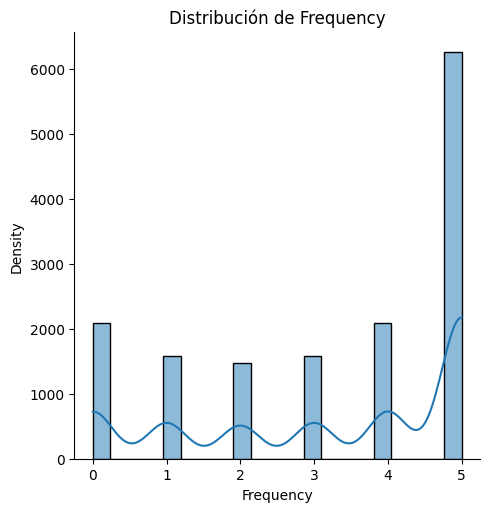

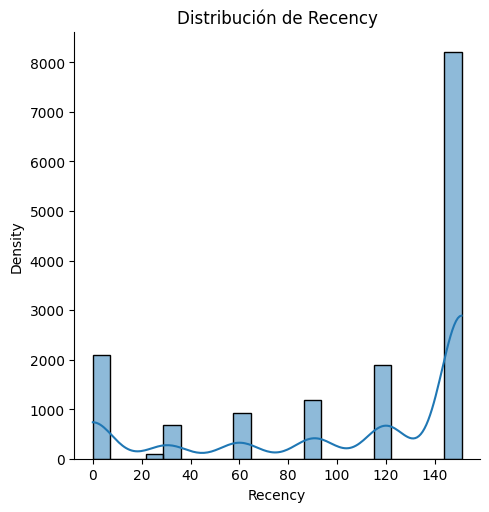

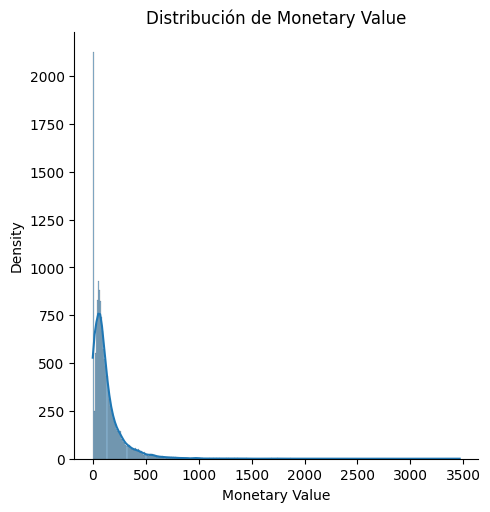

In [ ]:
# Graficamos la distribución de Frequency
sns.displot(data=rfm_summary_6m1, x='frequency', kde=True)
plt.title('Distribución de Frequency')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.show()

# Graficamos la distribución de Recency
sns.displot(data=rfm_summary_6m1, x='recency', kde=True)
plt.title('Distribución de Recency')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.show()

# Graficamos la distribución de Monetary Value
sns.displot(data=rfm_summary_6m1, x='monetary_value', kde=True)
plt.title('Distribución de Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Density')
plt.show()

A continuación, calculamos el número óptimo de clusters para luego definir el modelo de segmentación según el método K-Means.

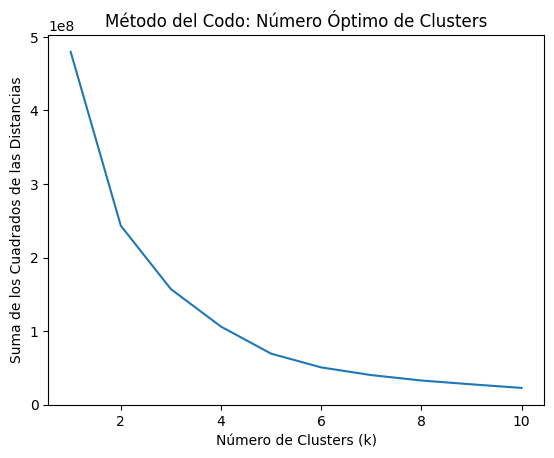

In [ ]:
# Obtenemos las métricas RFM (Recency, Frequency, Monetary Value)
rfm_metrics_6m1 = rfm_summary_6m1[['recency', 'frequency', 'monetary_value']]

# Calculamos la suma de los cuadrados de las distancias dentro del cluster para diferentes valores de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_metrics_6m1)
    sse.append(kmeans.inertia_)

# Graficamos la suma de los cuadrados de las distancias dentro del cluster en función de k
plt.plot(range(1, 11), sse)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de los Cuadrados de las Distancias')
plt.title('Método del Codo: Número Óptimo de Clusters')
plt.show()

In [ ]:
# Creamos el modelo de clustering KMeans con 4 clusters
kmeans_6m1 = KMeans(n_clusters=4, random_state=25)
kmeans_6m1.fit(rfm_metrics_6m1)

# Obtenemos las etiquetas de cluster para cada registro
cluster_labels_6m1 = kmeans_6m1.labels_

# Creamos un nuevo DataFrame con las métricas RFM y las etiquetas de cluster
rfm_clusters_6m1 = pd.DataFrame(rfm_metrics_6m1, columns=['recency', 'frequency', 'monetary_value'])
rfm_clusters_6m1['cluster'] = cluster_labels_6m1

# Calculamos el scoring por recency, frequency y monetary value
rfm_clusters_6m1['recency_score'] = pd.qcut(rfm_clusters_6m1['recency'], q=4, labels=False, duplicates='drop') + 1
rfm_clusters_6m1['frequency_score'] = pd.qcut(rfm_clusters_6m1['frequency'], q=4, labels=False, duplicates='drop') + 1
rfm_clusters_6m1['monetary_value_score'] = pd.qcut(rfm_clusters_6m1['monetary_value'], q=4, labels=False, duplicates='drop') + 1

# Calculamos el scoring total sumando los scores individuales
rfm_clusters_6m1['scoring'] = rfm_clusters_6m1['recency_score'] + rfm_clusters_6m1['frequency_score'] + rfm_clusters_6m1['monetary_value_score']

# Mostramos el DataFrame con los scores por cluster
print(rfm_clusters_6m1)

               recency  frequency  monetary_value  cluster  recency_score  \
CDTITULAR_DEF                                                               
4.0              120.0        3.0       35.000000        0              2   
10.0             151.0        5.0      292.000000        1              2   
11.0               0.0        0.0        0.000000        3              1   
21.0             151.0        5.0      127.400000        0              2   
27.0             151.0        4.0      118.500000        0              2   
...                ...        ...             ...      ...            ...   
49928.0           89.0        3.0       30.666667        3              2   
49934.0            0.0        0.0        0.000000        3              1   
49948.0          151.0        5.0      286.600000        1              2   
49953.0           31.0        1.0       74.000000        3              1   
49956.0          120.0        2.0       59.500000        0              2   

In [ ]:
group_distribution_6m1 = rfm_clusters_6m1['cluster'].value_counts(normalize=True)

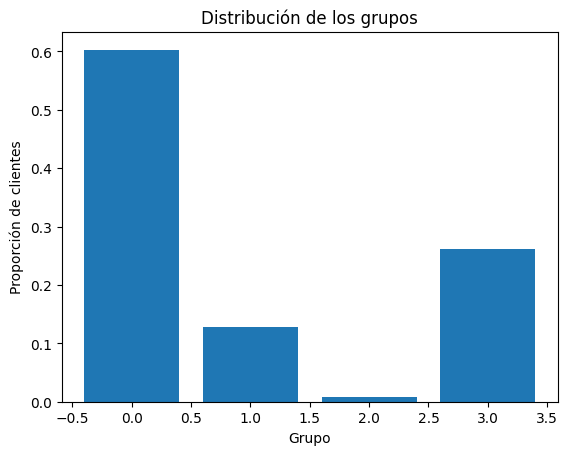

In [ ]:
# Crear el gráfico de barras de la distribución de los grupos
plt.bar(group_distribution_6m1.index, group_distribution_6m1.values)

# Configurar las etiquetas del eje x y el título del gráfico
plt.xlabel('Grupo')
plt.ylabel('Proporción de clientes')
plt.title('Distribución de los grupos')

# Mostrar el gráfico
plt.show()

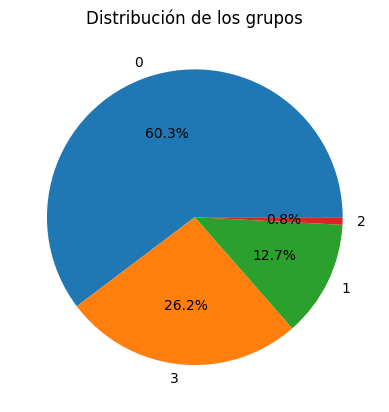

In [ ]:
plt.pie(group_distribution_6m1.values, labels=group_distribution_6m1.index, autopct='%1.1f%%')

# Configurar el título del gráfico
plt.title('Distribución de los grupos')

# Mostrar el gráfico
plt.show()

In [ ]:
cluster_0_6m1 = rfm_clusters_6m1.loc[rfm_clusters_6m1['cluster'] == 0]
cluster_0_characteristics_6m1 = cluster_0_6m1.describe()
# Imprimimos los resultados para el primer cluster
print(cluster_0_characteristics_6m1)

           recency    frequency  monetary_value  cluster  recency_score  \
count  9079.000000  9079.000000     9079.000000   9079.0    9079.000000   
mean    137.526269     4.018945      108.806309      0.0       1.966847   
std      24.370229     1.203136       56.550937      0.0       0.179047   
min      28.000000     1.000000        7.500000      0.0       1.000000   
25%     120.000000     3.000000       64.450000      0.0       2.000000   
50%     151.000000     4.000000       98.200000      0.0       2.000000   
75%     151.000000     5.000000      145.800000      0.0       2.000000   
max     151.000000     5.000000      249.800000      0.0       2.000000   

       frequency_score  monetary_value_score      scoring  
count      9079.000000           9079.000000  9079.000000  
mean          2.354885              2.690715     7.012446  
std           0.716359              0.875200     1.331222  
min           1.000000              1.000000     4.000000  
25%           2.000000  

In [ ]:
cluster_1_6m1 = rfm_clusters_6m1.loc[rfm_clusters_6m1['cluster'] == 1]
cluster_1_characteristics_6m1 = cluster_1_6m1.describe()
# Imprimimos los resultados para el primer cluster
print(cluster_1_characteristics_6m1)

           recency    frequency  monetary_value  cluster  recency_score  \
count  1915.000000  1915.000000     1915.000000   1915.0    1915.000000   
mean    143.897650     4.710183      391.903803      1.0       1.960836   
std      22.553593     0.819100      127.697736      0.0       0.194037   
min      30.000000     1.000000      250.200000      1.0       1.000000   
25%     151.000000     5.000000      289.300000      1.0       2.000000   
50%     151.000000     5.000000      353.000000      1.0       2.000000   
75%     151.000000     5.000000      457.650000      1.0       2.000000   
max     151.000000     5.000000      817.000000      1.0       2.000000   

       frequency_score  monetary_value_score      scoring  
count      1915.000000                1915.0  1915.000000  
mean          2.808877                   4.0     8.769713  
std           0.495565                   0.0     0.651918  
min           1.000000                   4.0     6.000000  
25%           3.000000  

In [ ]:
cluster_2_6m1 = rfm_clusters_6m1.loc[rfm_clusters_6m1['cluster'] == 2]
cluster_2_characteristics_6m1 = cluster_2_6m1.describe()
# Imprimimos los resultados para el primer cluster
print(cluster_2_characteristics_6m1)

          recency   frequency  monetary_value  cluster  recency_score  \
count  124.000000  124.000000      124.000000    124.0     124.000000   
mean   139.596774    4.596774     1248.973387      2.0       1.919355   
std     30.560062    1.043130      507.803496      0.0       0.273394   
min     31.000000    1.000000      821.000000      2.0       1.000000   
25%    151.000000    5.000000      901.150000      2.0       2.000000   
50%    151.000000    5.000000     1025.700000      2.0       2.000000   
75%    151.000000    5.000000     1378.050000      2.0       2.000000   
max    151.000000    5.000000     3465.200000      2.0       2.000000   

       frequency_score  monetary_value_score     scoring  
count       124.000000                 124.0  124.000000  
mean          2.758065                   4.0    8.677419  
std           0.603122                   0.0    0.851096  
min           1.000000                   4.0    6.000000  
25%           3.000000                   4.0   

In [ ]:
cluster_3_6m1 = rfm_clusters_6m1.loc[rfm_clusters_6m1['cluster'] == 3]
cluster_3_characteristics_6m1 = cluster_3_6m1.describe()
# Imprimimos los resultados para el primer cluster
print(cluster_3_characteristics_6m1)

           recency    frequency  monetary_value  cluster  recency_score  \
count  3942.000000  3942.000000     3942.000000   3942.0    3942.000000   
mean     27.864028     0.709031       20.894681      3.0       1.136733   
std      34.319074     0.886800       27.865211      0.0       0.343608   
min       0.000000     0.000000        0.000000      3.0       1.000000   
25%       0.000000     0.000000        0.000000      3.0       1.000000   
50%       0.000000     0.000000        0.000000      3.0       1.000000   
75%      59.000000     1.000000       40.000000      3.0       1.000000   
max     120.000000     4.000000      129.000000      3.0       2.000000   

       frequency_score  monetary_value_score      scoring  
count      3942.000000           3942.000000  3942.000000  
mean          1.048706              1.264587     3.450025  
std           0.215281              0.509996     0.736832  
min           1.000000              1.000000     3.000000  
25%           1.000000  

#Análisis para la muestra de 6m (semestre 2)

calculamos los valores de frequency, recency y revenue de cada cliente Análisis RFM

In [ ]:
# Obtenemos los clientes distintos de dataset_6m2
unique_customers_6m2 = dataset_6m2['CDTITULAR_DEF'].unique()

# Creamos un DataFrame con las columnas CDTITULAR_DEF, CDMES_TRX_Mes_Año y CAIMPORTE
rfm_data_6m2 = pd.DataFrame({
    'CDTITULAR_DEF': dataset_6m2['CDTITULAR_DEF'],
    'CDMES_TRX_Mes_Año': dataset_6m2['CDMES_TRX_Mes_Año'],
    'CAIMPORTE': dataset_6m2['CAIMPORTE']
})

# Calculamos las métricas RFM utilizando la función summary_data_from_transaction_data
rfm_summary_6m2 = summary_data_from_transaction_data(rfm_data_6m2, 'CDTITULAR_DEF', 'CDMES_TRX_Mes_Año', monetary_value_col='CAIMPORTE')

# Agregamos el CustomerID como columna en el DataFrame resultante
rfm_summary_6m2['CDTITULAR_DEF'] = unique_customers_6m2

# Visualizamos el DataFrame con las métricas RFM
print(rfm_summary_6m2)

               frequency  recency      T  monetary_value  CDTITULAR_DEF
CDTITULAR_DEF                                                          
4.0                  4.0    153.0  153.0           74.75            4.0
10.0                 5.0    153.0  153.0          268.60           10.0
11.0                 0.0      0.0   30.0            0.00           11.0
21.0                 5.0    153.0  153.0          180.20           21.0
27.0                 3.0    123.0  153.0           95.00           27.0
...                  ...      ...    ...             ...            ...
49940.0              0.0      0.0   91.0            0.00        49940.0
49943.0              1.0     30.0   30.0           43.00        49943.0
49948.0              5.0    153.0  153.0          350.60        49948.0
49956.0              4.0    153.0  153.0          108.50        49956.0
49959.0              0.0      0.0  153.0            0.00        49959.0

[15346 rows x 5 columns]


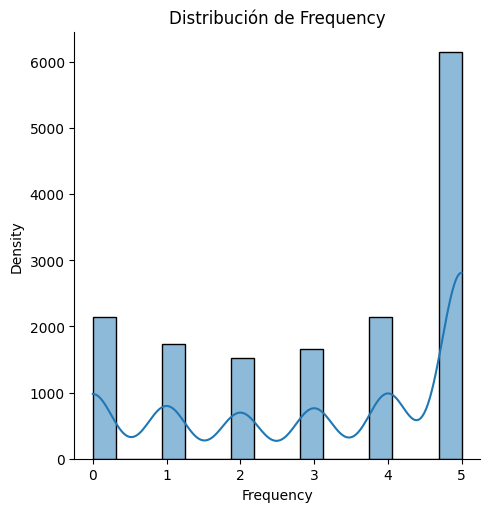

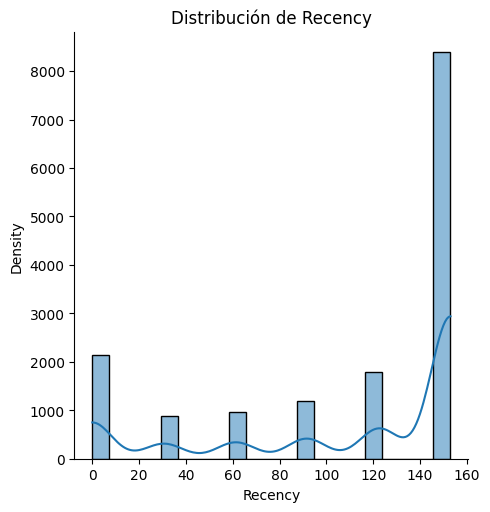

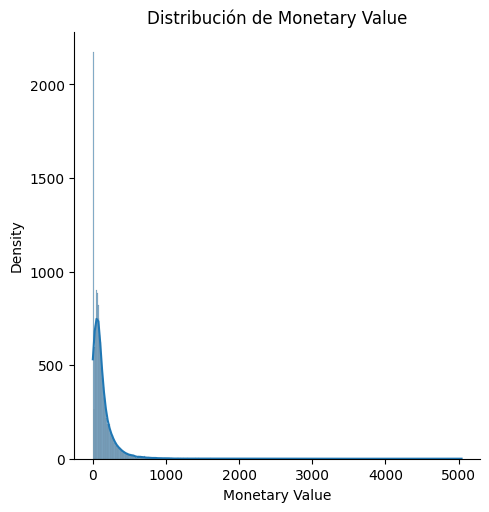

In [ ]:
# Graficar la distribución de Frequency
sns.displot(data=rfm_summary_6m2, x='frequency', kde=True)
plt.title('Distribución de Frequency')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.show()

# Graficar la distribución de Recency
sns.displot(data=rfm_summary_6m2, x='recency', kde=True)
plt.title('Distribución de Recency')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.show()

# Graficar la distribución de Monetary Value
sns.displot(data=rfm_summary_6m2, x='monetary_value', kde=True)
plt.title('Distribución de Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Density')
plt.show()

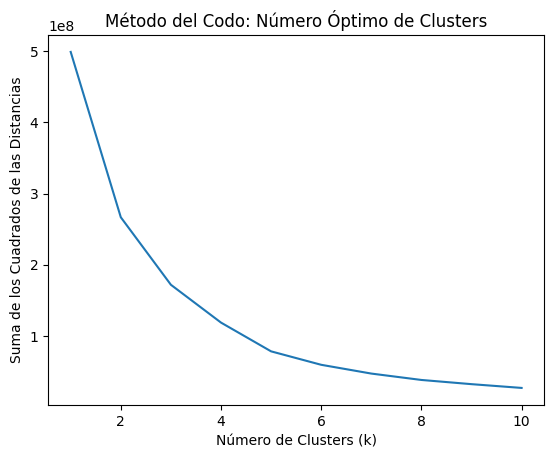

In [ ]:
# Obtenemos las métricas RFM (Recency, Frequency, Monetary Value)
rfm_metrics_6m2 = rfm_summary_6m2[['recency', 'frequency', 'monetary_value']]

# Calculamos la suma de los cuadrados de las distancias dentro del cluster para diferentes valores de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_metrics_6m2)
    sse.append(kmeans.inertia_)

# Graficamos la suma de los cuadrados de las distancias dentro del cluster en función de k
plt.plot(range(1, 11), sse)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de los Cuadrados de las Distancias')
plt.title('Método del Codo: Número Óptimo de Clusters')
plt.show()

In [ ]:
# Creamos el modelo de clustering KMeans con 4 clusters
kmeans_6m2 = KMeans(n_clusters=4, random_state=25)
kmeans_6m2.fit(rfm_metrics_6m2)

# Obtenemos las etiquetas de cluster para cada registro
cluster_labels_6m2 = kmeans_6m2.labels_

# Creamos un nuevo DataFrame con las métricas RFM y las etiquetas de cluster
rfm_clusters_6m2 = pd.DataFrame(rfm_metrics_6m2, columns=['recency', 'frequency', 'monetary_value'])
rfm_clusters_6m2['cluster'] = cluster_labels_6m2

# Calculamos el scoring por recency, frequency y monetary value
rfm_clusters_6m2['recency_score'] = pd.qcut(rfm_clusters_6m2['recency'], q=4, labels=False, duplicates='drop') + 1
rfm_clusters_6m2['frequency_score'] = pd.qcut(rfm_clusters_6m2['frequency'], q=4, labels=False, duplicates='drop') + 1
rfm_clusters_6m2['monetary_value_score'] = pd.qcut(rfm_clusters_6m2['monetary_value'], q=4, labels=False, duplicates='drop') + 1

# Calculamos el scoring total sumando los scores individuales
rfm_clusters_6m2['scoring'] = rfm_clusters_6m2['recency_score'] + rfm_clusters_6m2['frequency_score'] + rfm_clusters_6m2['monetary_value_score']

# Mostramos el DataFrame con los scores por cluster
print(rfm_clusters_6m2)

               recency  frequency  monetary_value  cluster  recency_score  \
CDTITULAR_DEF                                                               
4.0              153.0        4.0           74.75        2              2   
10.0             153.0        5.0          268.60        1              2   
11.0               0.0        0.0            0.00        0              1   
21.0             153.0        5.0          180.20        2              2   
27.0             123.0        3.0           95.00        2              2   
...                ...        ...             ...      ...            ...   
49940.0            0.0        0.0            0.00        0              1   
49943.0           30.0        1.0           43.00        0              1   
49948.0          153.0        5.0          350.60        1              2   
49956.0          153.0        4.0          108.50        2              2   
49959.0            0.0        0.0            0.00        0              1   

In [ ]:
group_distribution_6m2 = rfm_clusters_6m2['cluster'].value_counts(normalize=True)

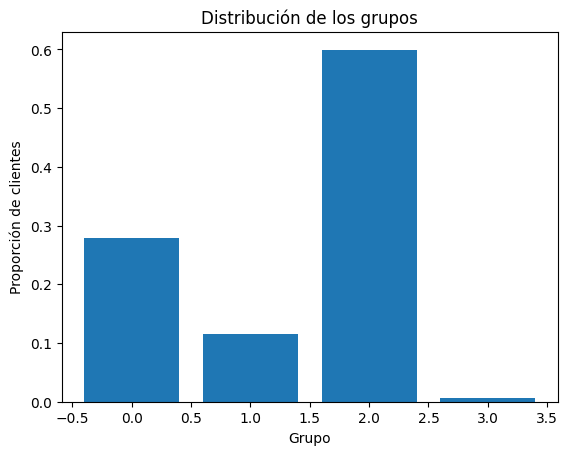

In [ ]:
# Crear el gráfico de barras de la distribución de los grupos
plt.bar(group_distribution_6m2.index, group_distribution_6m2.values)

# Configurar las etiquetas del eje x y el título del gráfico
plt.xlabel('Grupo')
plt.ylabel('Proporción de clientes')
plt.title('Distribución de los grupos')

# Mostrar el gráfico
plt.show()

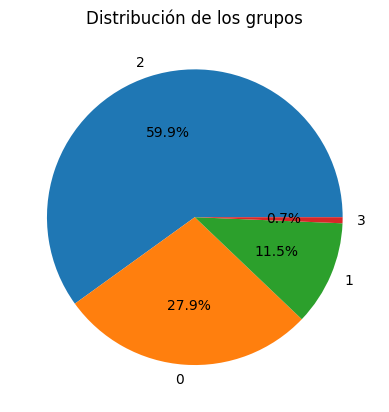

In [ ]:
plt.pie(group_distribution_6m2.values, labels=group_distribution_6m2.index, autopct='%1.1f%%')

# Configurar el título del gráfico
plt.title('Distribución de los grupos')

# Mostrar el gráfico
plt.show()

In [ ]:
cluster_0_6m2 = rfm_clusters_6m2.loc[rfm_clusters_6m2['cluster'] == 0]
cluster_0_characteristics_6m2 = cluster_0_6m2.describe()
# Imprimimos los resultados para el primer cluster
print(cluster_0_characteristics_6m2)

           recency    frequency  monetary_value  cluster  recency_score  \
count  4287.000000  4287.000000     4287.000000   4287.0    4287.000000   
mean     30.855143     0.755773       22.737734      0.0       1.154887   
std      36.396175     0.897356       29.056388      0.0       0.361839   
min       0.000000     0.000000        0.000000      0.0       1.000000   
25%       0.000000     0.000000        0.000000      0.0       1.000000   
50%      30.000000     1.000000        5.000000      0.0       1.000000   
75%      61.000000     1.000000       40.000000      0.0       1.000000   
max     123.000000     4.000000      135.000000      0.0       2.000000   

       frequency_score  monetary_value_score      scoring  
count      4287.000000           4287.000000  4287.000000  
mean          1.200140              1.289946     3.644973  
std           0.400152              0.538009     0.930839  
min           1.000000              1.000000     3.000000  
25%           1.000000  

In [ ]:
cluster_1_6m2 = rfm_clusters_6m2.loc[rfm_clusters_6m2['cluster'] == 1]
cluster_1_characteristics_6m2 = cluster_1_6m2.describe()
# Imprimimos los resultados para el primer cluster
print(cluster_1_characteristics_6m2)

           recency    frequency  monetary_value  cluster  recency_score  \
count  1759.000000  1759.000000     1759.000000   1759.0    1759.000000   
mean    145.225696     4.681069      404.524683      1.0       1.954520   
std      24.987294     0.869166      139.460558      0.0       0.208415   
min      30.000000     1.000000      258.800000      1.0       1.000000   
25%     153.000000     5.000000      299.100000      1.0       2.000000   
50%     153.000000     5.000000      358.800000      1.0       2.000000   
75%     153.000000     5.000000      467.000000      1.0       2.000000   
max     153.000000     5.000000      886.800000      1.0       2.000000   

       frequency_score  monetary_value_score      scoring  
count      1759.000000                1759.0  1759.000000  
mean          2.819215                   4.0     8.773735  
std           0.447792                   0.0     0.607100  
min           1.000000                   4.0     6.000000  
25%           3.000000  

In [ ]:
cluster_2_6m2 = rfm_clusters_6m2.loc[rfm_clusters_6m2['cluster'] == 2]
cluster_2_characteristics_6m2 = cluster_2_6m2.describe()
# Imprimimos los resultados para el primer cluster
print(cluster_2_characteristics_6m2)

           recency    frequency  monetary_value  cluster  recency_score  \
count  9199.000000  9199.000000     9199.000000   9199.0    9199.000000   
mean    140.686596     4.034134      112.640325      2.0       1.969236   
std      23.917766     1.182392       58.496015      0.0       0.172688   
min      30.000000     1.000000        6.333333      2.0       1.000000   
25%     123.000000     3.000000       67.000000      2.0       2.000000   
50%     153.000000     4.000000      101.500000      2.0       2.000000   
75%     153.000000     5.000000      151.400000      2.0       2.000000   
max     153.000000     5.000000      259.333333      2.0       2.000000   

       frequency_score  monetary_value_score      scoring  
count      9199.000000           9199.000000  9199.000000  
mean          2.452984              2.741494     7.163713  
std           0.578236              0.884703     1.228045  
min           1.000000              1.000000     4.000000  
25%           2.000000  

In [ ]:
cluster_3_6m2 = rfm_clusters_6m2.loc[rfm_clusters_6m2['cluster'] == 3]
cluster_3_characteristics_6m2 = cluster_3_6m2.describe()
# Imprimimos los resultados para el primer cluster
print(cluster_3_characteristics_6m2)

          recency   frequency  monetary_value  cluster  recency_score  \
count  101.000000  101.000000      101.000000    101.0     101.000000   
mean   147.524752    4.762376     1380.939109      3.0       1.960396   
std     21.452083    0.736865      610.327265      0.0       0.196000   
min     30.000000    1.000000      898.400000      3.0       1.000000   
25%    153.000000    5.000000     1001.200000      3.0       2.000000   
50%    153.000000    5.000000     1171.800000      3.0       2.000000   
75%    153.000000    5.000000     1614.000000      3.0       2.000000   
max    153.000000    5.000000     5041.800000      3.0       2.000000   

       frequency_score  monetary_value_score     scoring  
count       101.000000                 101.0  101.000000  
mean          2.871287                   4.0    8.831683  
std           0.365058                   0.0    0.511259  
min           1.000000                   4.0    6.000000  
25%           3.000000                   4.0   